Throughout this course, we will learn to *summarzie* the distribution of a variable with a **single value**. Depending on the particular charactersitics of a distribution, there are different summary statistics such as **mean, the weighted mean, the median, and the mode**.<br>
We will also learn to measure the *variability* in a distribution using measures such as **variance and standard deviation**.<br>
We will also learn **z-score**.

We can think of the mean as being the value lcoated at the particular point in the distribution where the total distance of the values below the mean is the same as the total distance of the values that are above the mean.
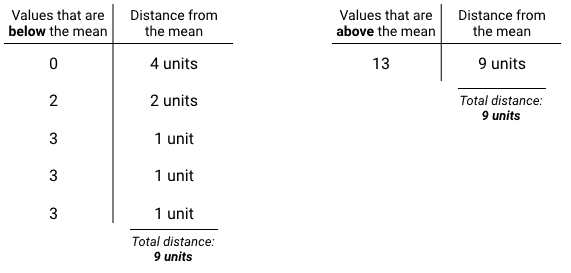

It is true for the distribution of any variable measured on an interval or ratio scale. <br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
equal_distance = 0
for i in range(5000):
    np.random.seed(i)
    distribution=np.random.randint(0,1000,10)
    mean = sum(distribution)/len(distribution)
    
    above=[]
    below=[]
    for value in distribution:
        if value == mean:
            continue
        if value < mean:
            below.append(mean-value)
        if value>mean:
            above.append(value-mean)
    sum_above=round(sum(above),1)
    sum_below=round(sum(below),1)
    if (sum_above ==sum_below):
        equal_distance +=1

In [4]:
equal_distance

5000

This confirms that for each of the 5000 distributions the total distance of the values above the mean is equal to the total distance of the values below the mean.<br>
Next, we will be working with a data set that describes characteristics of houses sold between 2006 and 2010 in the city of Ames , Iowa. There are 2930 rows in the data set, and each row describes a house. For each house there are 82 characteristics described, which means there are 82 columns in the data set.

In [2]:
houses = pd.read_table('AmesHousing_1.txt')

In [8]:
houses.head(3)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,131770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000


In the paper published [here](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627), The initial Excel file contained 113 variables describing 3970 property sales that had occurred in Ames, Iowa between 2006 an 2010". If we wanted to measure the mean sale prices for all the houses sold between 2006 and 2010 in Ames, Iowa, the data stored in the AmesHousing_1.txt would be a sample and we are not sure whether this sample is representative to the population.

In [19]:
houses['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In practice, we almost always work with samples. However, most of the time we are not interested in answering questions about samples because we want to answer questions about population. Many questions can be reduced to finding the mean of a population:
- What is the mean amount of money our customers spent last year on our website?
- What is the mean amount of time customers spent daily the first week after the promotion we ran? 
- What is the mean sale price of a house in Ames, Iowa for the period 2006 - 2010?

When we only have sample but want to find the mean in the population, the best we can do is to compute the sample mean $\bar{x}$ and hope it's a good estimate for the population mean $\mu$ <br>
$sampling error=\mu - \bar{x}$

Our aim is to reduce sampling error. Two important factors that influence the sampling error are:
- Sample representativiey: the more representative a sample is, the closer $\bar{x}$ will be to $\mu$
- Sample size: the larger the sample, the more chances we are going to get a representative sample

Next, we try to visualize on a scatter plot how the sampling error changes as we increase the sample size. 

In [22]:
parameter = houses['SalePrice'].mean()
sample_size=5

sample_sizes=[]
sampling_errors=[]

for i in range(101):
    sample=houses['SalePrice'].sample(sample_size,random_state=1)
    statistic=sample.mean()
    sampling_error=parameter - statistic
    sampling_errors.append(sampling_error)
    sample_sizes.append(sample_size)
    sample_size +=29

Text(0, 0.5, 'Sampling error')

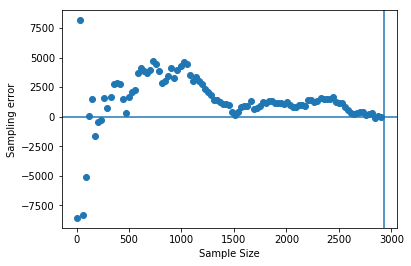

In [23]:
plt.scatter(sample_sizes,sampling_errors)
plt.axhline(0)
plt.axvline(2930)
plt.xlabel('Sample Size')
plt.ylabel('Sampling error')

## Estimate from Low-Sized Samples
It is observed from sampling error figure above that the sampling error tend to decrease as the sample size increase. However, there are cases that small sample sizes gives better estimates for the population $\mu$ than large sample sizes did.
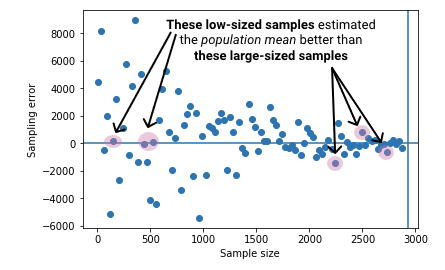
For any given sample size, we can have many combinations of values. Most of the samples of size 3 will give a good estiamte of the population mean $\mu$. 

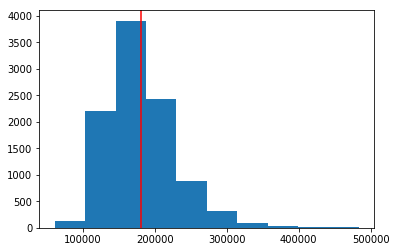

In [25]:
means =[]
for i in range(10000):
    sample = houses['SalePrice'].sample(3,random_state=i)
    means.append(sample.mean())

plt.hist(means)
plt.axvline(houses['SalePrice'].mean(),c='r')

From figure above, we can observe that most sample means cluster around the population mean. This indicates that when we take a sample of size 3, and compute $\bar{x}$, we ahve fairly good chances to get a good estiamte for the population mean $\mu$. It's also worth noting that the mean of the 10000 sample we measured is very close to the population mean $\mu$

In [27]:
houses['SalePrice'].mean()-sum(means)/len(means)

-28.665231740800664

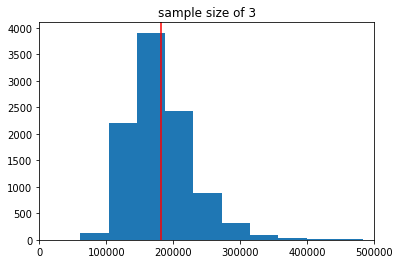

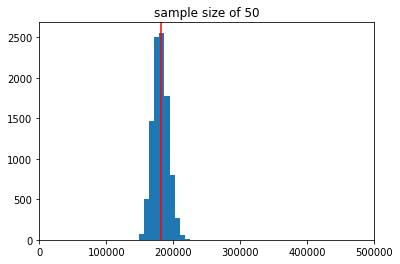

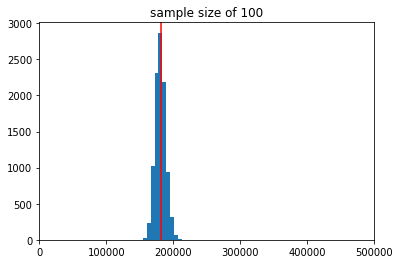

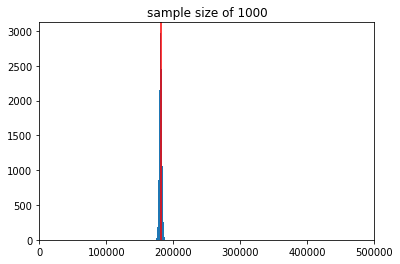

In [33]:
for size in [3,50,100,1000]:
    means =[]
    for i in range(10000):
        sample = houses['SalePrice'].sample(size,random_state=i)
        means.append(sample.mean())

    plt.hist(means)
    plt.axvline(houses['SalePrice'].mean(),c='r')
    plt.xlim(0,500000)
    s='sample size of '+str(size)
    plt.title(s)
    plt.show()

# The weighted mean and the Median

In [34]:
houses_per_year=pd.DataFrame({
    'Year':[2006,2007,2008,2009,2010],
    'Mean Price':[181761.648000,185138.207493,178841.750804,181404.567901,172597.598240],
    'Houses Sold':[625,694,622,648,341]
})

In [35]:
houses_per_year

,Year,Mean Price,Houses Sold
0,2006,181761.648000,625
1,2007,185138.207493,694
2,2008,178841.750804,622
3,2009,181404.567901,648
4,2010,172597.598240,341


In [36]:
mean_new = houses_per_year['Mean Price'].mean()
mean_original = houses['SalePrice'].mean()
difference = mean_original - mean_new

In [37]:
difference

847.3055806593911

The difference is due to different number of houses sold for each year. 

In [38]:
houses_per_year['Total_price']=houses_per_year['Mean Price']*houses_per_year['Houses Sold']
mean_2=houses_per_year['Total_price'].sum()/houses_per_year['Houses Sold'].sum()

In [39]:
mean_2 - mean_original

-2.7997884899377823e-08

In [40]:
def weighted_mean(distribution,weights):
    weighted_sum=[]
    for mean,weight in zip(distribution,weights):
        weighted_sum.append(mean*weight)
    return sum(weighted_sum)/sum(weights)

In [41]:
weighted_mean(houses_per_year['Mean Price'],houses_per_year['Houses Sold'])

180796.0600682314

In [42]:
np.average(houses_per_year['Mean Price'],weights=houses_per_year['Houses Sold'])

180796.0600682314

## The Median for Open-ended Distributions

In [44]:
houses['TotRms AbvGrd'].value_counts()

6             844
7             649
5             586
8             347
4             203
9             143
10 or more    131
3              26
2               1
Name: TotRms AbvGrd, dtype: int64

The upper boundary is not defined precesely as the highest value is '10 or more'.Thus, `TotRms AbvGrd` has an **open-ended distribution**.<br>
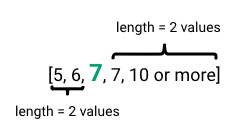

In [45]:
distribution1 = [23, 24, 22, '20 years or lower,', 23, 42, 35]
distribution2 = [55, 38, 123, 40, 71]
distribution3 = [45, 22, 7, '5 books or lower', 32, 65, '100 books or more']
median1 = 23
median2 = 55
median3 = 32

In [55]:
rooms = houses['TotRms AbvGrd'].copy()
rooms.replace({'10 or more':10},inplace=True)

In [56]:
rooms=rooms.astype(int)

In [57]:
rooms_sorted=rooms.sort_values()

In [58]:
middle_indices=[int((len(rooms_sorted) / 2)),
                  int((len(rooms_sorted) / 2 + 1))
                 ]

In [59]:
middle_indices

[1465, 1466]

In [60]:
middle_values = rooms_sorted.iloc[middle_indices] # make sure you don't use loc[]
median = middle_values.mean()

In [61]:
median

6.0

## The Median as a Resistant Statistic
The fact we only consider middle value as median makes it more resistant comapred to the mean, and it's classified as a **resistant** or **robustic statistic**.<br>
This property makes the median ideal for finding **reasonable averages** for distributions containing *outliers*. 

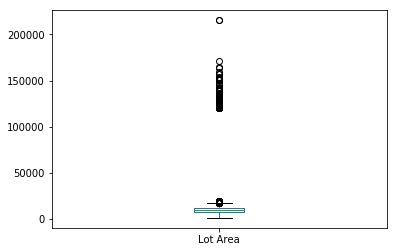

In [62]:
houses['Lot Area'].plot.box()

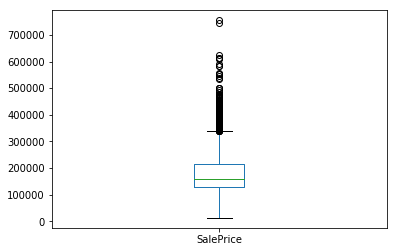

In [63]:
houses['SalePrice'].plot.box()

In [64]:
lotarea_difference = houses['Lot Area'].mean() - houses['Lot Area'].median()
saleprice_difference = houses['SalePrice'].mean() - houses['SalePrice'].median()

In [65]:
print (lotarea_difference,saleprice_difference)

3680.7051194539254 20796.060068259394


## The Median for Ordinal Scales

In [66]:
houses['Overall Cond'].value_counts().sort_index()

1       7
2      10
3      50
4     101
5    1654
6     533
7     390
8     144
9      41
Name: Overall Cond, dtype: int64

In [67]:
houses['Overall Cond'].mean()

5.563139931740614

In [68]:
houses['Overall Cond'].median()

5.0

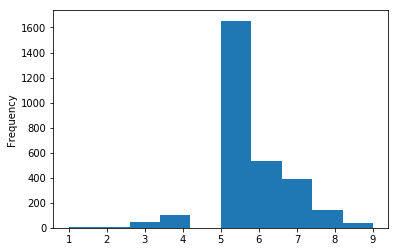

In [69]:
houses['Overall Cond'].plot.hist()

The mean seems more representative and more informative because it captures the fact that there are more houses rated above 5 than rated under 5. The mean is slightly shifted above 5.

# The Mode
The mode is ideal for ordinal and nominal data.

In [71]:
houses['Land Slope'].unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [74]:
houses['Roof Style'].unique()

array(['Hip', 'Gable', 'Mansard', 'Gambrel', 'Shed', 'Flat'], dtype=object)

In [75]:
houses['Land Slope'].mode()

0    Gtl
dtype: object

In [77]:
houses['Land Slope'].value_counts()

Gtl    2789
Mod     125
Sev      16
Name: Land Slope, dtype: int64

**Mode is preferred for discrete variables**<br>
Take note that variables measured on interval or ratio scales can be classified as discrete or continous.<br>
For example, if we want to analyze the house market in Ames and we want to describe how many kitchens the typical house has. 

In [4]:
houses['Kitchen AbvGr'].value_counts()

1    2796
2     129
0       3
3       2
Name: Kitchen AbvGr, dtype: int64

In [5]:
houses['Kitchen AbvGr'].mean()

1.0443686006825939

In [6]:
houses['Kitchen AbvGr'].median()

1.0

In [8]:
houses['Kitchen AbvGr'].mode()[0]

1

The mean is 1.04 which does not make sense as people would expect number of kitchens be a whole number. Median is 1 , a value is easier for non-technical people , however, this is by chance that the median happens to be 1.<br>
The mode is 1. We can say that typical house in the market ahs 1 kitchen.

## Skewed Distribution

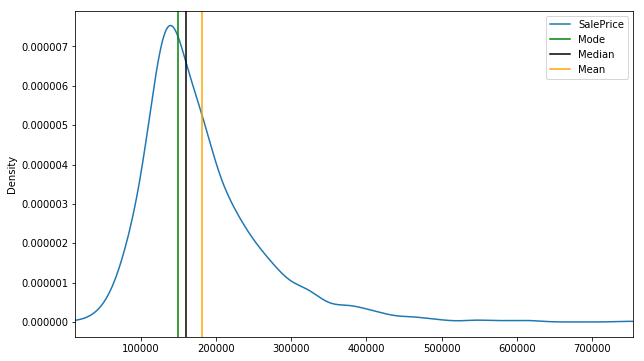

In [12]:
plt.figure(figsize=(10,6))
houses['SalePrice'].plot.kde(xlim = (houses['SalePrice'].min(),
                                     houses['SalePrice'].max()
                                    )
                            )
plt.axvline(150000, color = 'Green', label = 'Mode')
plt.axvline(houses['SalePrice'].median(), color = 'Black', label = 'Median')
plt.axvline(houses['SalePrice'].mean(), color = 'Orange', label = 'Mean')
plt.legend()

The distribution is right skewed:
- Most values are concentrated in the left body of the distribution where they will form a peak, and this is where mode will be.
- Median divides a distribution in two halves of equal length, the median is positioned slightly right from the peak (the mode) for a right-skewed distribution
- The mean is affected by the outliers in the right tail and usually pull the mean to the right of the median.

## Symmetrical Distribution

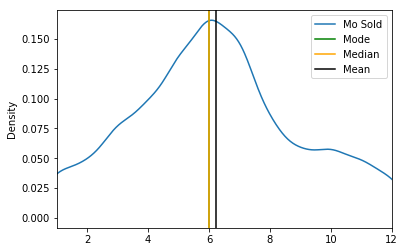

In [13]:
houses['Mo Sold'].plot.kde(xlim = [1,12])

import matplotlib.pyplot as plt
plt.axvline(houses['Mo Sold'].mode()[0], color = 'Green', label = 'Mode')
plt.axvline(houses['Mo Sold'].median(), color = 'Orange', label = 'Median')
plt.axvline(houses['Mo Sold'].mean(), color = 'Black', label = 'Mean')
plt.legend()

# Measures of Variability
## The Range

In [14]:
def find_range(array):
    return max(array) - min(array)

range_by_year = {}
for year in houses['Yr Sold'].unique():
    data_by_year = houses[houses['Yr Sold'] == year]
    range_by_year[year] = find_range(data_by_year['SalePrice'])

In [15]:
range_by_year

{2010: 598868, 2009: 575100, 2008: 601900, 2007: 715700, 2006: 590000}

## Average Distance
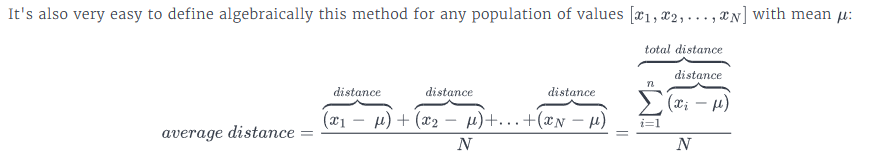

In [16]:
C = [1,1,1,1,1,1,1,1,1,21]

In [17]:
def average_distance(array):
    reference_point = sum(array)/len(array)
    
    distances=[]
    for value in array:
        distances.append(value-reference_point)
    return sum(distances)/len(distances)

In [18]:
average_distance(C)

0.0

The average distance is 0 and this is because the balance point of the distribution.
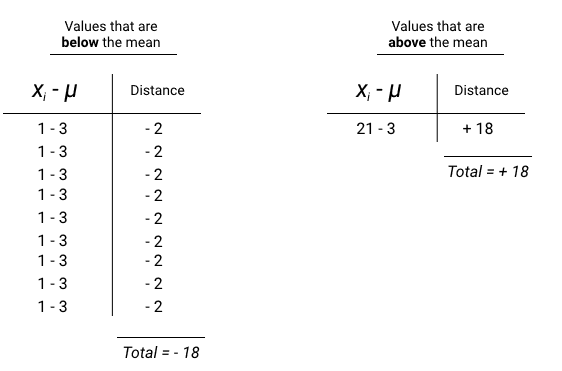

## Mean Absolute Deviation
Instead, we could take the absolute value of each distance and then sum up the absolute values. The **absolute value** , also called **modulus**.
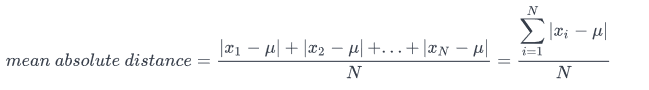
This is the measure of variability: mean absolute deviation. 

In [19]:
def mean_absolute_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        absolute_distance = abs(value - reference_point)
        distances.append(absolute_distance)
        
    return sum(distances) / len(distances)

mad = mean_absolute_deviation(C)

In [20]:
mad

3.6

## Variance
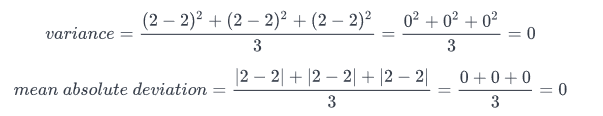

In [21]:
def variance(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
        
    return sum(distances) / len(distances)

variance_C = variance(C)

In [22]:
variance_C

36.0

## Standard Deviation
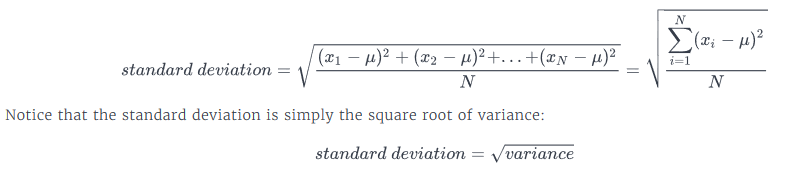

## Measure of Spread
Another way to understand deviation is as a **measure of spread** in a distribution - values in a distribution can be more or less spread. Take 50 sample points each from the `SalePrice` distribution, and then plot histogram to visualize the spread for each sample.
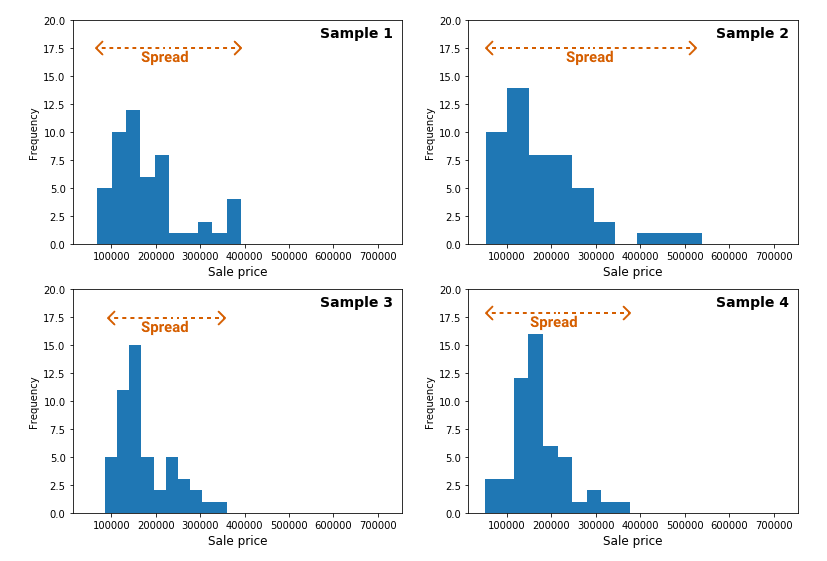

In [23]:
def standard_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
        
    variance = sum(distances) / len(distances)
    
    return sqrt(variance)

## Sample Standard Deviation


Let's consider the data we have for `SalePrice` a population and sample it 5000 times. For each of the 5000 iterations of a `for` loop:

- Sample 10 data points from the `SalePrice` variable using the `Series.sample()` method.
    - The `random_state` of `Series.sample()` should be 0 for the first iteration, 1 for the second iteration, 2 for the third, and so on.
- Compute the standard deviation of the sample using the `standard_deviation()` function.
- Append the standard deviation to a list that will eventually store all the 5000 sample standard deviations.

In [26]:
from math import sqrt

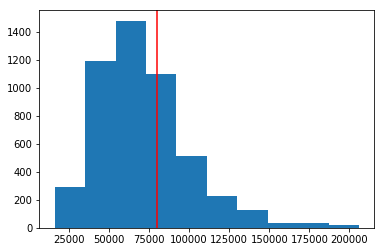

In [29]:
st_devs = []

for i in range(5000):
    sample = houses['SalePrice'].sample(10, random_state = i)
    st_dev = standard_deviation(sample)
    st_devs.append(st_dev)
    
plt.hist(st_devs)
plt.axvline(standard_deviation(houses['SalePrice']),c='r')

## Bassel's Correction
The above figure is a plot of 5000 sample standard deviation with population standard deviation. Notice that **most of sample standard deviation are clustered below population standard deviation**.
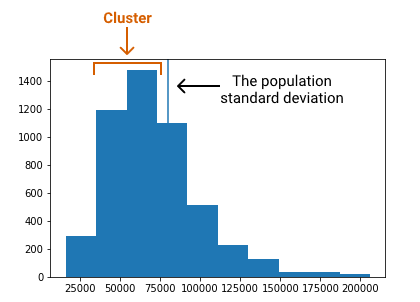
Which suggests that **sample standard deviation** usually *underestimate* the population standard deviation.

It is easier to understand why sample standard deviation underestiamte in terms of distribution spread.
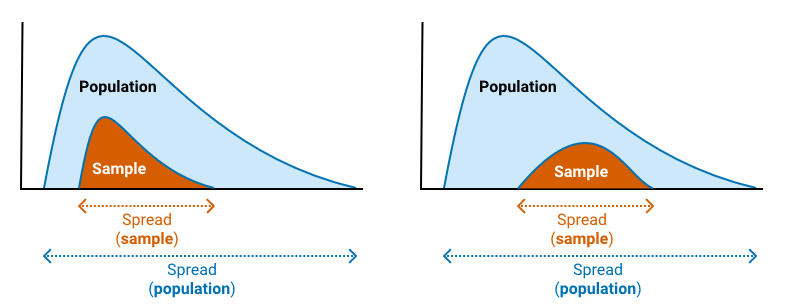

### Bassel's correction
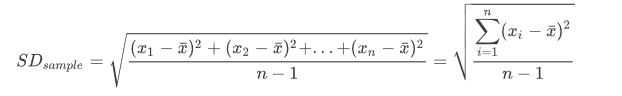

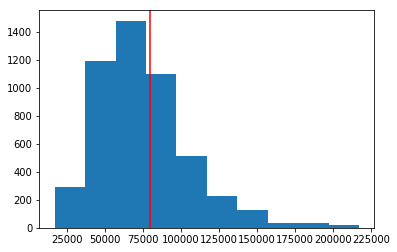

In [30]:
#implement Bassel's correction
def standard_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
    
    variance = sum(distances) / (len(distances) - 1)
    
    return sqrt(variance)

import matplotlib.pyplot as plt
st_devs = []

for i in range(5000):
    sample = houses['SalePrice'].sample(10, random_state = i)
    st_dev = standard_deviation(sample)
    st_devs.append(st_dev)
    
plt.hist(st_devs)
plt.axvline(standard_deviation(houses['SalePrice']),c='r')

In [31]:
sample = houses.sample(100, random_state = 1)
sample['SalePrice'].std(ddof = 1)

76469.14464354338

In [33]:
sample['SalePrice'].var(ddof = 1)

5847530082.515158

# Z-scores
## Individual Values
Sample randomly only one sample from `SalPrice`

In [34]:
houses['SalePrice'].sample(1,random_state=0)

2216    220000
Name: SalePrice, dtype: int64

In [35]:
houses['SalePrice'].mean()

180796.0600682594

We can see that the sampled house (\\$220,000) is more expensive than the average house (\\$180,796), but we would like know *is this price slightly above the average or extremely above the average*? <br>
The answer depends on the **standard deviation** of the distribution of sale prices.

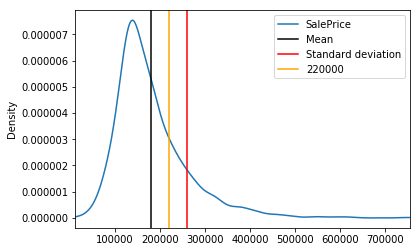

In [36]:
houses['SalePrice'].plot.kde(xlim = (houses['SalePrice'].min(),
                                    houses['SalePrice'].max()
                                    )
                            )

st_dev = houses['SalePrice'].std(ddof = 0)
mean = houses['SalePrice'].mean()
plt.axvline(mean, color = 'Black', label = 'Mean')
plt.axvline(mean + st_dev, color = 'Red', label = 'Standard deviation')
plt.axvline(220000, color = 'Orange', label = '220000')
plt.legend()

Since it is within one standard deviation and slightly above mean, it is *not very expensive*

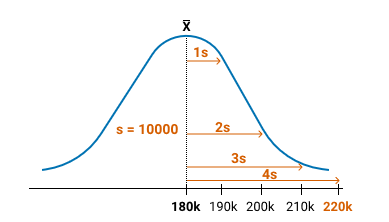
We can measure how far off a value from the mean *in terms of number of standard deviation*.

In [37]:
distance = 220000 - houses['SalePrice'].mean()

In [38]:
distance/houses['SalePrice'].std(ddof=0)

0.4908280788718362

## Z-scores
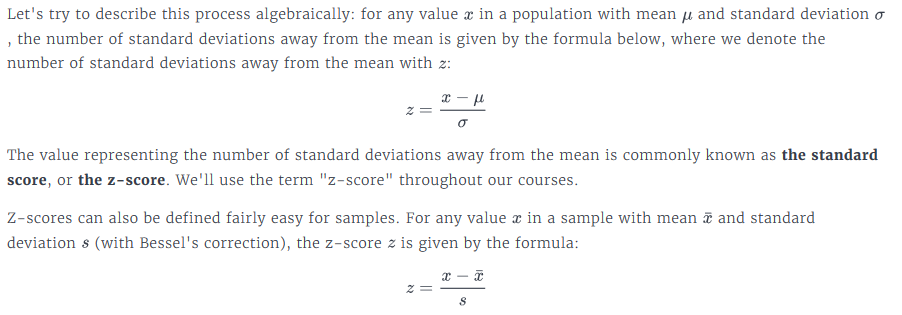

In [39]:
def z_score(value, array, bessel = 0):
    mean = sum(array) / len(array)
    
    from numpy import std
    st_dev = std(array, ddof = bessel)
    
    distance = value - mean
    z = distance / st_dev
    
    return z

In [41]:
min_val = houses['SalePrice'].min()
mean_val = houses['SalePrice'].mean()
max_val = houses['SalePrice'].max()
min_z = z_score(min_val, houses['SalePrice'])
mean_z = z_score(mean_val, houses['SalePrice'])
max_z = z_score(max_val, houses['SalePrice'])

In [42]:
print (min_z,mean_z,max_z)

-2.1034258973406126 0.0 7.188956446929806


## Locating Values in Different Distribution
Let's now consider an example that's suggestive for the kind of questions we can answer using z-scores.

Let's say we're working as data analysts for a real estate company, and we want to find the best neighborhood in Ames to invest in (remember that our data set describes sale prices for houses in Ames, Iowa). Our company wants to buy a couple of houses that we can then rent and ideally sell back later at a higher price. We think that location is an important factor driving rental and sale prices, and we want to target our investment based on location.

The company budgeted \\$10,000,000 for this investment, and the plan is to buy 50 houses of $200,000 each. Depending on the market particularities of each neighborhood, a \\$200,000 house can be considered cheap, average-priced, or expensive. We want to find a neighborhood where a price of \\$200,000 goes as average because average-priced houses are the ones that are most rented and easiest to sell.

Sale prices are lower in a bad neighborhood, and someone can get a high-quality house for $200,000, but usually people avoid bad neighborhood nonetheless for a variety of reasons: distance from the workplace, lack of schools, pollution, noise, etc.

High-quality neighborhoods will tend to be avoided as well because of the higher sale prices — with $200,000, you may only be able to get a poor-quality house in a good location. So most people will aim for something in the middle — these people make up the market we intend to reach.

We're asked by our real estate specialists to analyze historical data on five neighborhoods:

    North Ames.
    College Creek.
    Old Town.
    Edwards.
    Somerset.

Our goal is to find out for which of these neighborhoods a \\$200,000 house is average-priced. We can solve this task quickly by measuring the z-score for a \\$200,000 value for each of the five distributions — each of the five neighborhoods has its own distribution of sale prices with its own mean and standard deviation.

We saw in the previous exercise that the mean of a distribution has a z-score of 0, so our recommendation should be the neighborhood with the z-score closest to 0 (we'll detail later in this mission why the mean of a distribution has a z-score of 0).

Note that we can't simply find the mean sale price of each neighborhood and then just subtract $200,000 from the mean to find the neighborhood with the lowest difference. This way we'd fail to take into account the variability of each distribution.

In [43]:
# Segment the data by location
north_ames = houses[houses['Neighborhood'] == 'NAmes']
clg_creek = houses[houses['Neighborhood'] == 'CollgCr']
old_town = houses[houses['Neighborhood'] == 'OldTown']
edwards = houses[houses['Neighborhood'] == 'Edwards']
somerset = houses[houses['Neighborhood'] == 'Somerst']

# Find the z-score for 200000 for every location
z_by_location = {}
for data, neighborhood in [(north_ames, 'NAmes'), (clg_creek, 'CollgCr'),
                     (old_town, 'OldTown'), (edwards, 'Edwards'),
                     (somerset, 'Somerst')]:
    
    z_by_location[neighborhood] = z_score(200000, data['SalePrice'],
                                          bessel = 0)

# Find the location with the z-score closest to 0
print(z_by_location)

{'NAmes': 1.7239665910370237, 'CollgCr': -0.03334366282705464, 'OldTown': 1.7183080926865524, 'Edwards': 1.443576193848941, 'Somerst': -0.5186390646965722}


College Creek is the best choice as its z-score is closet to 0.

## Transforming Distributions
Z-scores are often used to transform entire distribution by converting all the values to z-scores. 

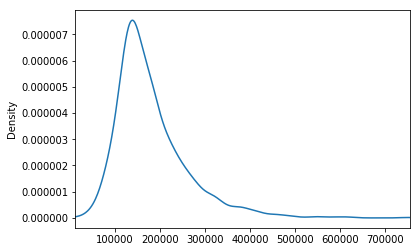

In [47]:
houses['SalePrice'].plot.kde(xlim = (houses['SalePrice'].min(),
                                    houses['SalePrice'].max()
                                   )
                           )

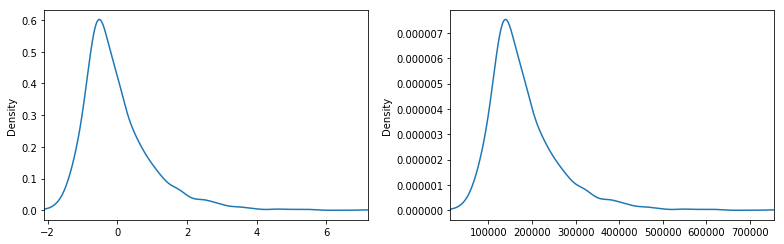

In [48]:
mean = houses['SalePrice'].mean()
st_dev = houses['SalePrice'].std(ddof = 0)

houses['z_prices'] = houses['SalePrice'].apply(
    lambda x: ((x - mean) / st_dev)
    )

plt.figure(figsize = (11,3.5))
plt.subplot(1,2,1)
houses['z_prices'].plot.kde(xlim = (houses['z_prices'].min(),
                                houses['z_prices'].max()
                                )
                        )
plt.subplot(1,2,2)
houses['SalePrice'].plot.kde(xlim = (houses['SalePrice'].min(),
                                    houses['SalePrice'].max()
                                     )
                            )
plt.tight_layout() # otherwise the plots will overlay partially

## The Standard Distribution
For every distribution of z-socres,the mean is always 0 and the standard deviation is always 1. The shape of the original distribution is preserved.<br>
A distribution of z-scores is often called **a standard distribution** (z-scores are also called *standard scores*).